In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, leaves_list

In [2]:
combined_dc = pd.read_csv('combined_figures/top50_degree_centrality_all_celltypes.csv')
combined_dc.head()

,cell_type,rank,gene,degree_centrality_all
0,Adipocyte,1,Tcf7l2,0.203156
1,Adipocyte,2,Ebf1,0.193294
2,Adipocyte,3,Zeb1,0.185404
3,Adipocyte,4,Klf12,0.175542
4,Adipocyte,5,Ets1,0.151874


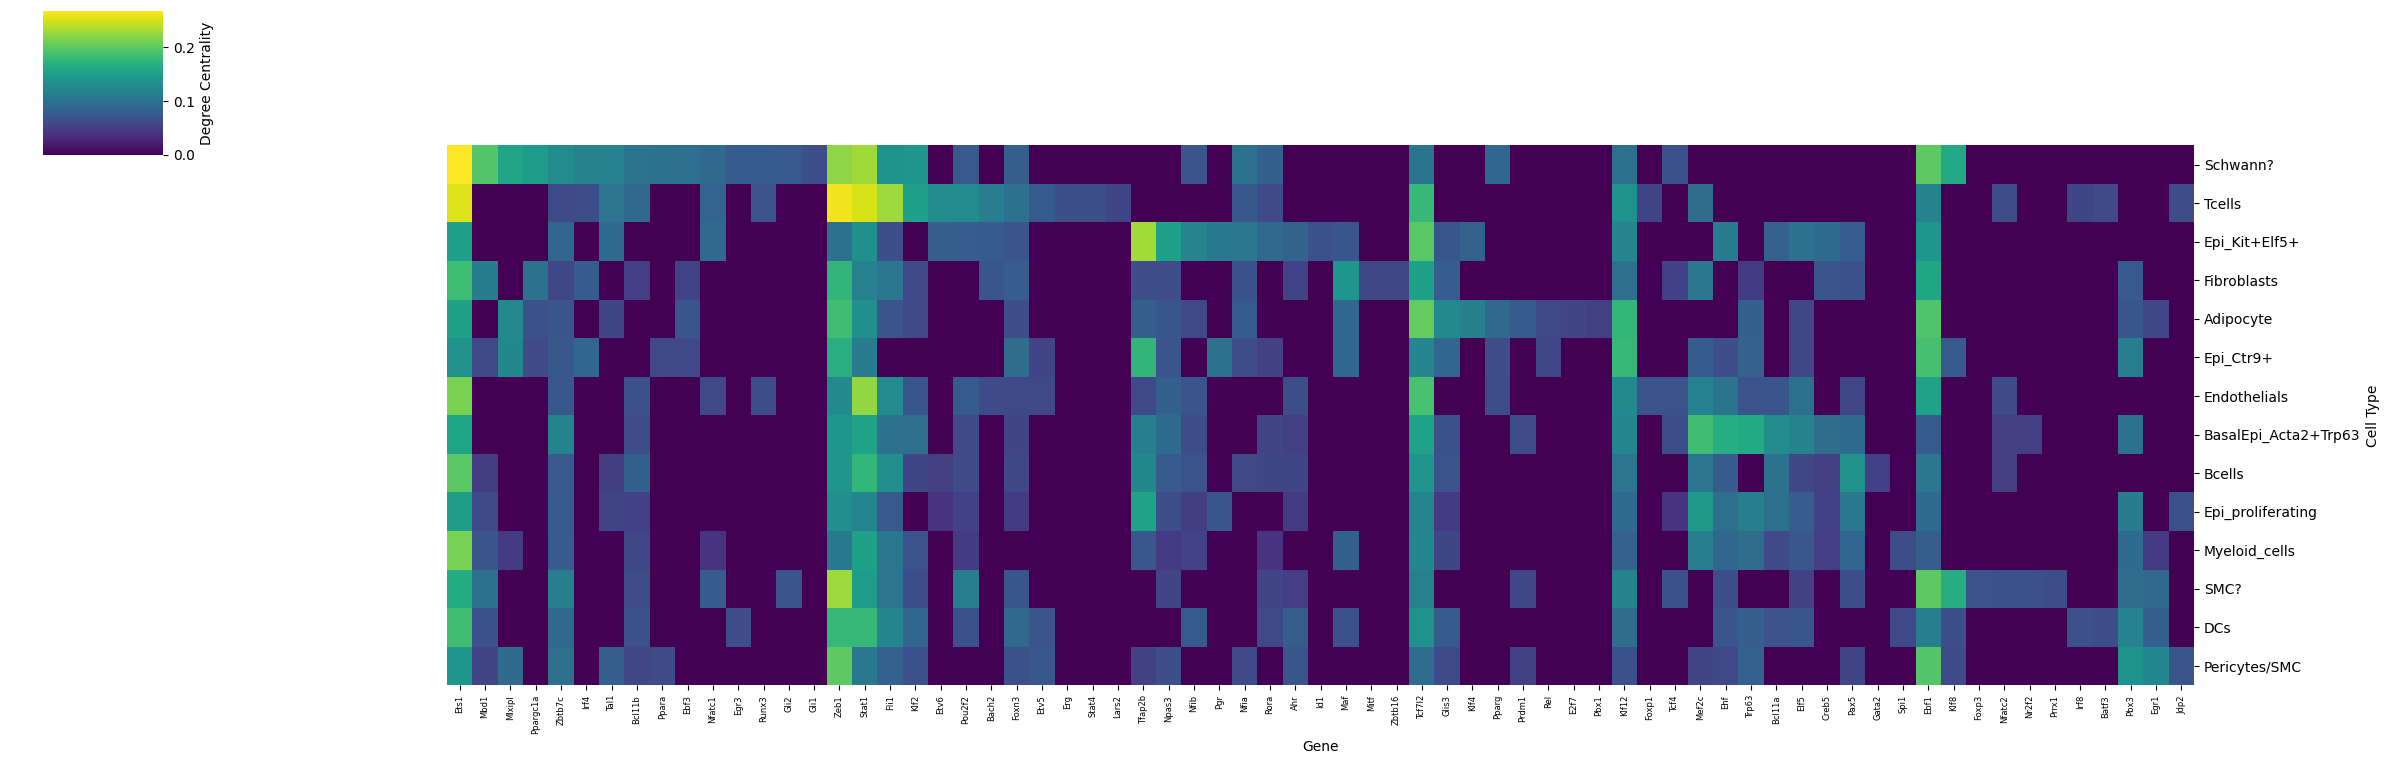

In [ ]:
#top 30 genes per cell type
top30 = combined_dc[combined_dc['rank'] <= 30]

heatmap_df = top30.pivot_table(index='cell_type', columns='gene', values='degree_centrality_all', fill_value=0)

# order rows by clustering
row_linkage = linkage(heatmap_df, method='average', metric='euclidean')
row_order = leaves_list(row_linkage)
heatmap_df = heatmap_df.iloc[row_order]

# order columns to form blocks
# For each gene, find which cell type has the max centrality
gene_max_ct = heatmap_df.idxmax(axis=0)  # gene -> cell type with max value
gene_max_val = heatmap_df.max(axis=0)     # gene -> max centrality value

# Map cell types to their row position in the clustered order
ct_position = {ct: i for i, ct in enumerate(heatmap_df.index)}

# Sort genes: first by cell type row position, then by centrality (descending)
gene_sort_key = pd.DataFrame({
    'gene': heatmap_df.columns,
    'ct_pos': gene_max_ct.map(ct_position),
    'max_val': -gene_max_val  # negative for descending
})
gene_sort_key = gene_sort_key.sort_values(['ct_pos', 'max_val'])
heatmap_df = heatmap_df[gene_sort_key['gene'].values]

g = sns.clustermap(
    heatmap_df,
    cmap='viridis',
    figsize=(24, 8),
    row_cluster=False, 
    col_cluster=False,
    cbar_kws={'label': 'Degree Centrality'},
    xticklabels=True,
    yticklabels=True,
)

g.ax_heatmap.set_xlabel('Gene')
g.ax_heatmap.set_ylabel('Cell Type')
g.ax_heatmap.tick_params(axis='x', rotation=90, labelsize=6)
# plt.savefig('clustered_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()